<a href="https://colab.research.google.com/github/KIQVinicius/FIAP-ML/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

In [ ]:
dataset = pd.read_csv("Consumo_cerveja.csv", sep = ",")
dataset['Temperatura Media (C)'] = dataset['Temperatura Media (C)'].str.replace(',', '.')
dataset['Temperatura Minima (C)'] = dataset['Temperatura Minima (C)'].str.replace(',', '.')
dataset['Temperatura Maxima (C)'] = dataset['Temperatura Maxima (C)'].str.replace(',', '.')
dataset['Precipitacao (mm)'] = dataset['Precipitacao (mm)'].str.replace(',', '.')

dataset['Temperatura Media (C)'] = dataset['Temperatura Media (C)'].astype(float)
dataset['Temperatura Minima (C)'] = dataset['Temperatura Minima (C)'].astype(float)
dataset['Temperatura Maxima (C)'] = dataset['Temperatura Maxima (C)'].astype(float)
dataset['Precipitacao (mm)'] = dataset['Precipitacao (mm)'].astype(float)

In [ ]:
dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [ ]:
dataset.shape

(941, 7)

## Estatísticas descritivas

In [ ]:
dataset.describe().round(2)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


In [ ]:
dataset.corr().round(4)

<ipython-input-118-e262efa3cd85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr().round(4)


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
Temperatura Minima (C),0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
Temperatura Maxima (C),0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
Precipitacao (mm),0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
Final de Semana,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
Consumo de cerveja (litros),0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


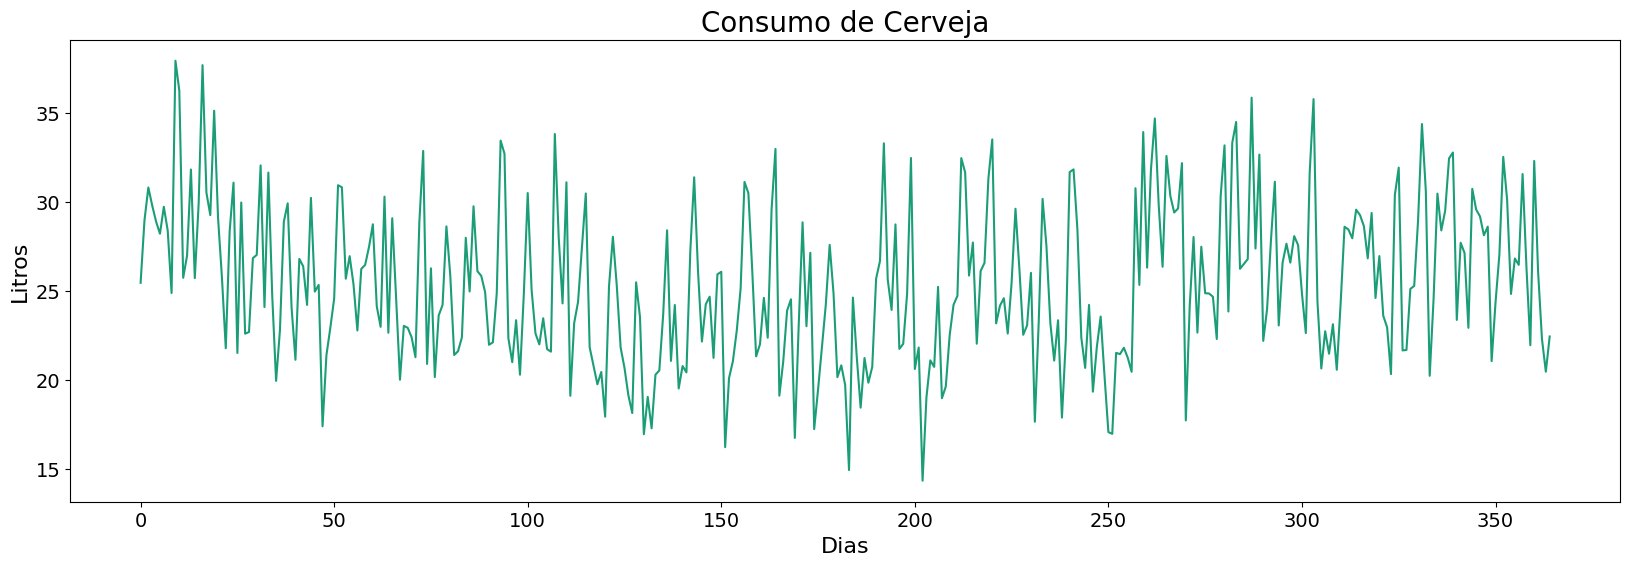

In [ ]:
fig,ax = plt.subplots(figsize = (20, 6))

ax.set_title("Consumo de Cerveja", fontsize = 20)
ax.set_ylabel("Litros", fontsize = 16)
ax.set_xlabel("Dias", fontsize = 16)
ax = dataset['Consumo de cerveja (litros)'].plot(fontsize = 14)

In [ ]:
import seaborn as sns

Text(0.5, 0, 'Litros')

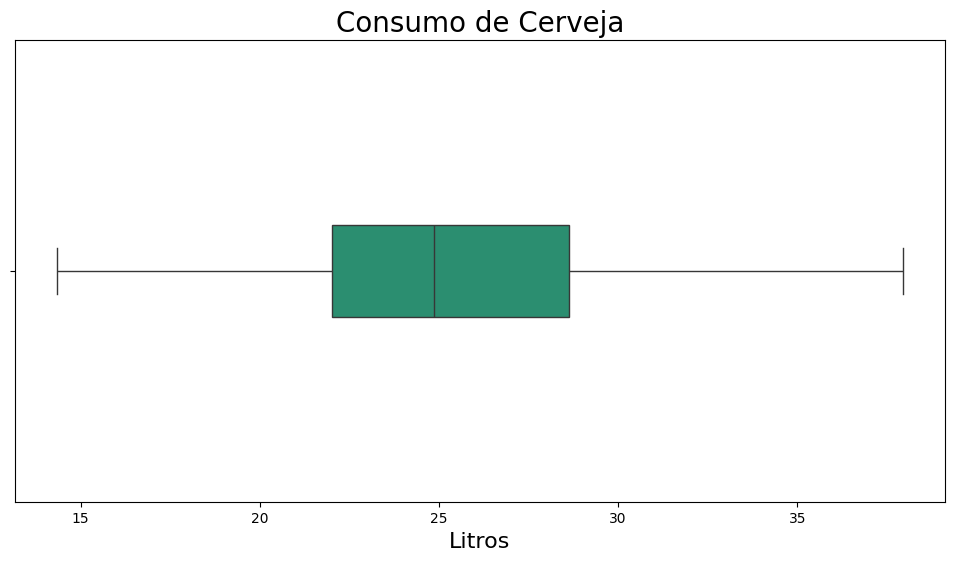

In [ ]:
ax = sns.boxplot(data = dataset['Consumo de cerveja (litros)'], orient='h', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title("Consumo de Cerveja", fontsize = 20)
ax.set_xlabel("Litros", fontsize = 16)

Text(0.5, 0, 'Final de semana')

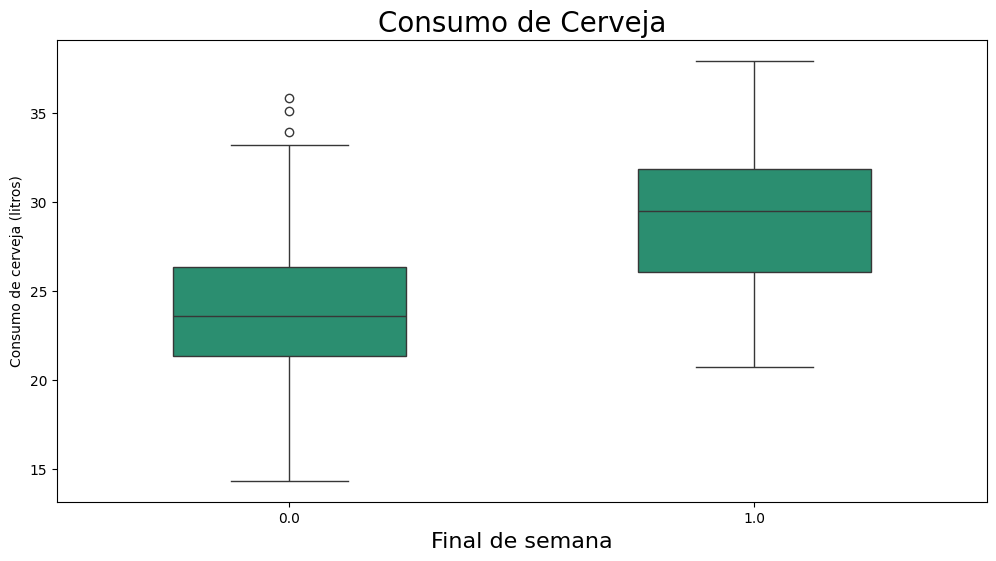

In [ ]:
ax = sns.boxplot(y = 'Consumo de cerveja (litros)', x = 'Final de Semana',data = dataset, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Consumo de Cerveja", fontsize = 20)
ax.set_xlabel("Final de semana", fontsize = 16)

<ipython-input-123-a3f38cd017f5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset['Consumo de cerveja (litros)'])


Text(0, 0.5, 'Litros')

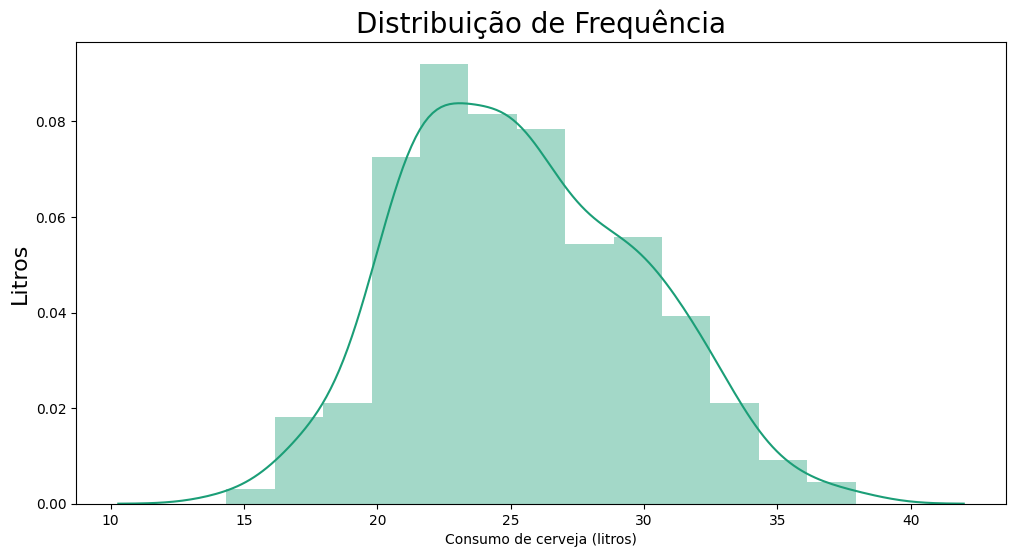

In [ ]:
ax = sns.distplot(dataset['Consumo de cerveja (litros)'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)

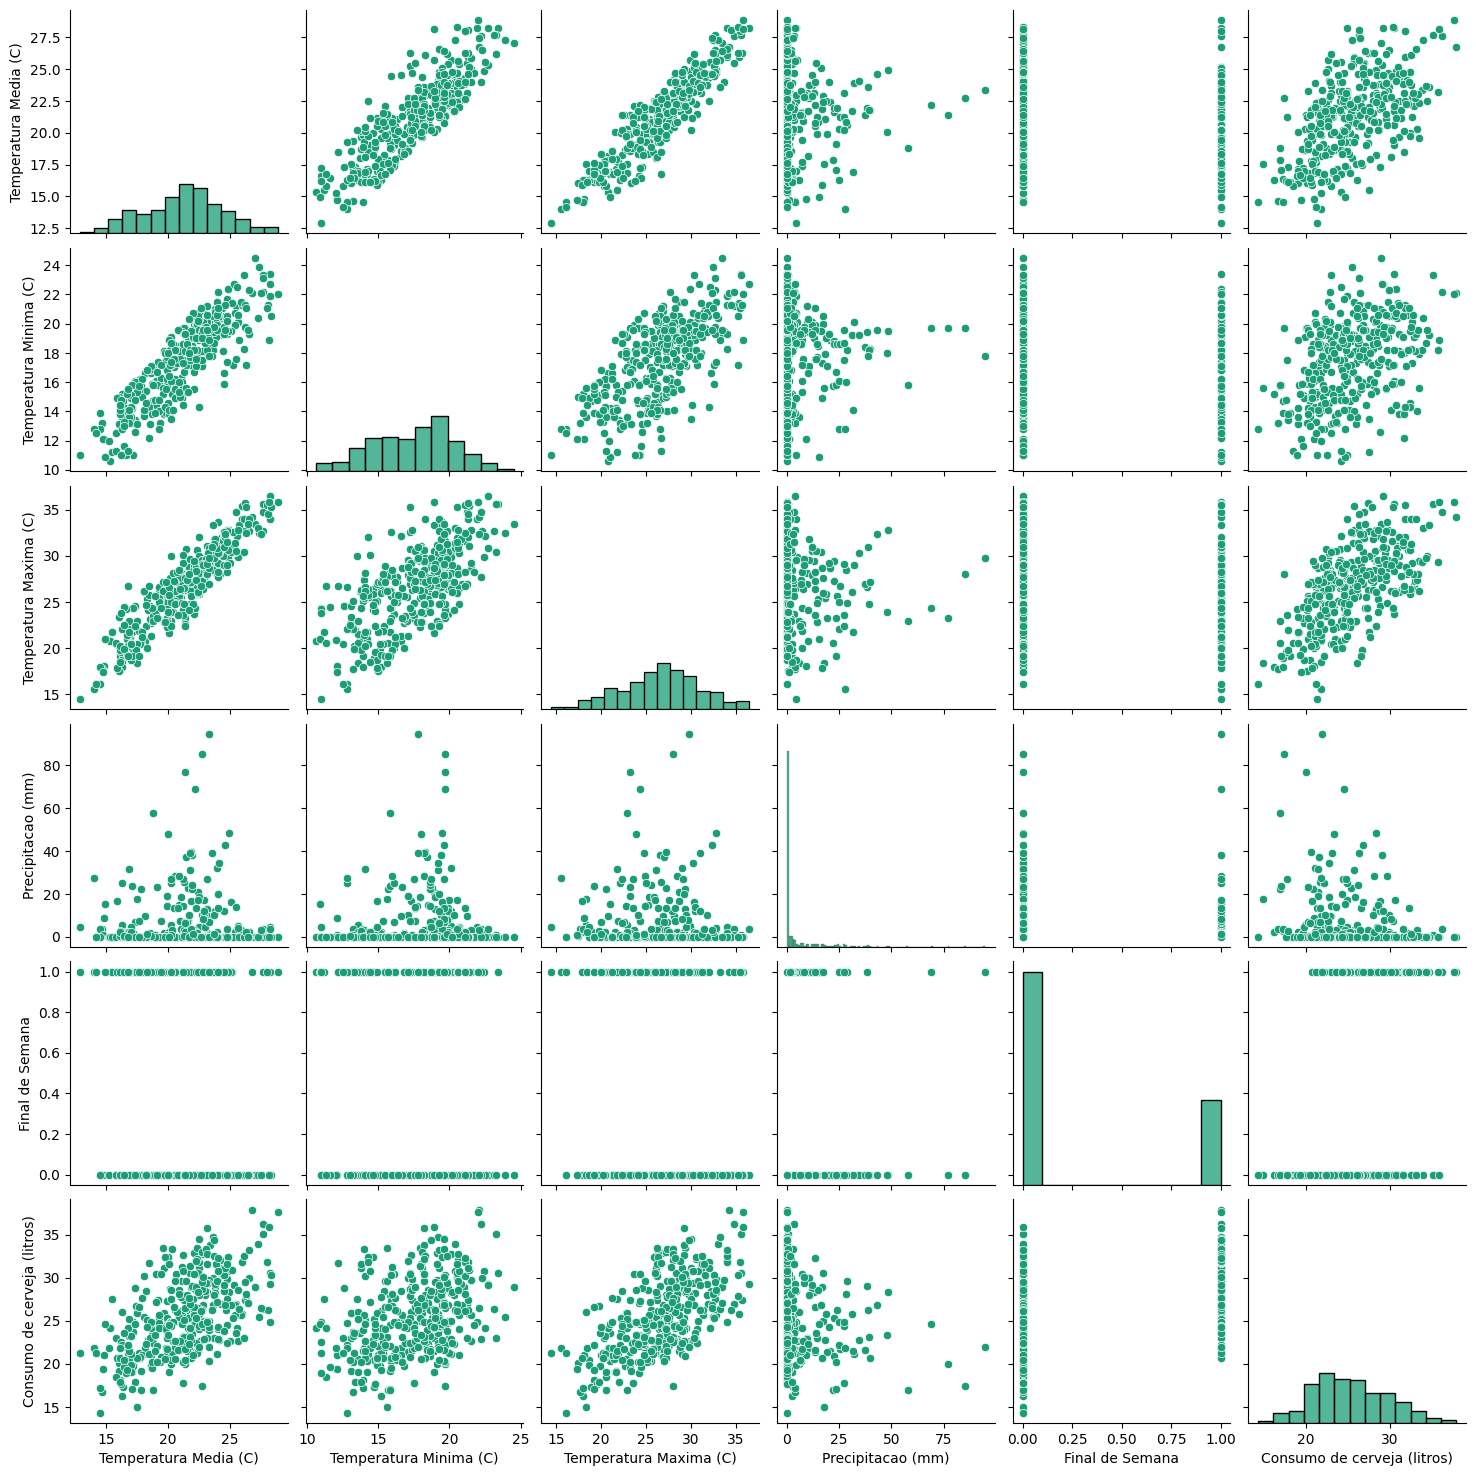

In [ ]:
ax = sns.pairplot(dataset)

In [ ]:
dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


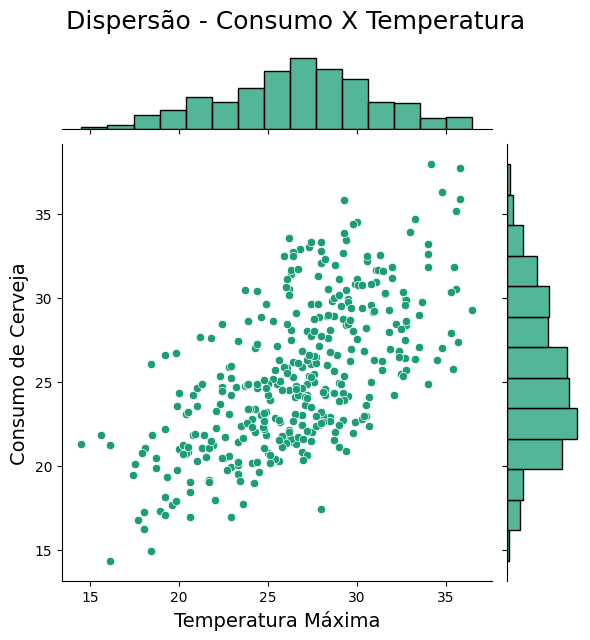

In [ ]:
ax = sns.jointplot(x='Temperatura Maxima (C)', y = 'Consumo de cerveja (litros)', data = dataset)
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize = 18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

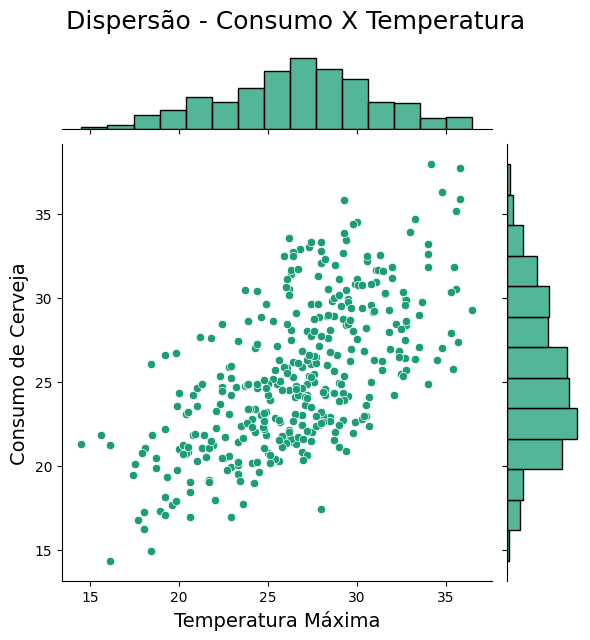

In [ ]:
ax = sns.jointplot(x='Temperatura Maxima (C)', y = 'Consumo de cerveja (litros)', data = dataset)
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize = 18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

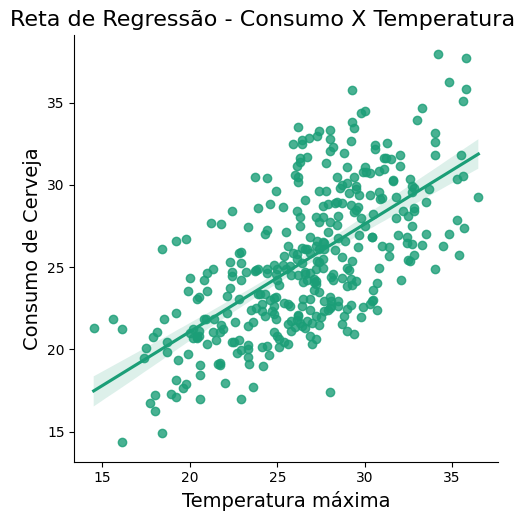

In [ ]:
ax = sns.lmplot(x = "Temperatura Maxima (C)", y = 'Consumo de cerveja (litros)', data =dataset)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize = 16, y=1.02)
ax.set_xlabels("Temperatura máxima", fontsize = 14)
ax.set_ylabels('Consumo de Cerveja', fontsize = 14)
ax

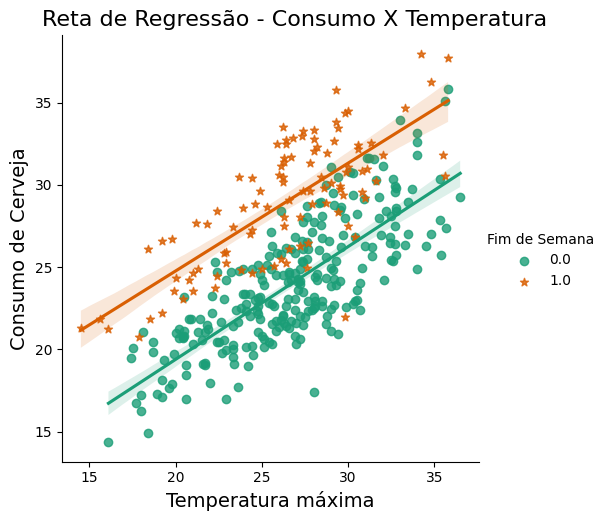

In [ ]:
ax = sns.lmplot(x = "Temperatura Maxima (C)", y = 'Consumo de cerveja (litros)', data =dataset, hue ="Final de Semana", markers = ['o', '*'], legend = False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize = 16, y=1.02)
ax.set_xlabels("Temperatura máxima", fontsize = 14)
ax.set_ylabels('Consumo de Cerveja', fontsize = 14)
ax.add_legend(title = "Fim de Semana")
ax

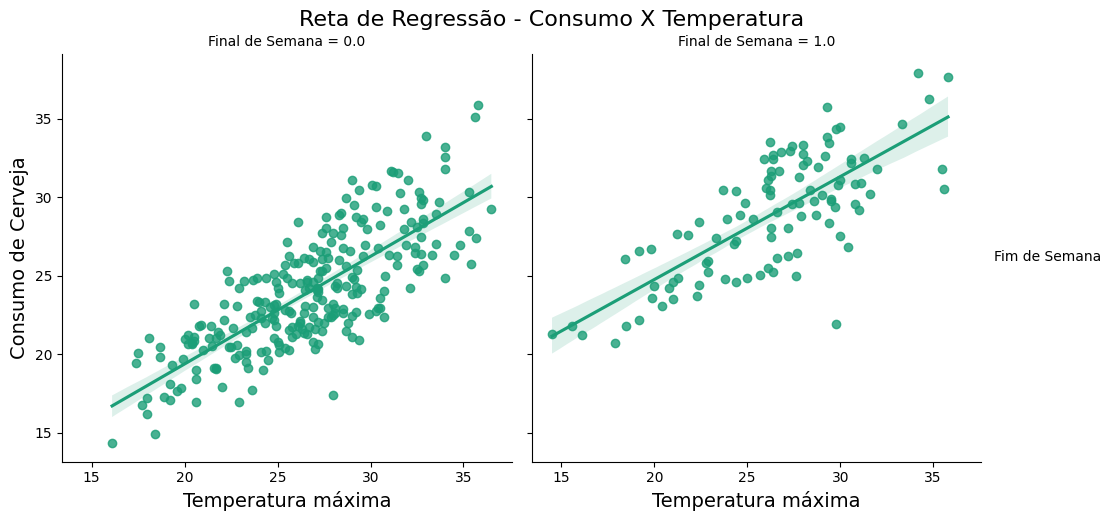

In [ ]:
ax = sns.lmplot(x = "Temperatura Maxima (C)", y = 'Consumo de cerveja (litros)', data =dataset, col ="Final de Semana")
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize = 16, y=1.02)
ax.set_xlabels("Temperatura máxima", fontsize = 14)
ax.set_ylabels('Consumo de Cerveja', fontsize = 14)
ax.add_legend(title = "Fim de Semana")
ax

In [ ]:
dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dataset = dataset.dropna()

In [ ]:
y = dataset['Consumo de cerveja (litros)']

In [ ]:
X = dataset[['Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2811)

In [ ]:
X_train.shape

(255, 3)

In [ ]:
X_test.shape

(110, 3)

In [ ]:
y_train

195    28.742
344    30.740
288    27.387
59     27.475
220    33.517
        ...  
73     32.872
68     23.042
215    27.724
341    27.713
84     27.989
Name: Consumo de cerveja (litros), Length: 255, dtype: float64

In [ ]:
y_test

5      28.218
83     22.401
40     21.137
143    31.387
193    25.640
        ...  
46     25.343
229    23.070
45     24.968
329    25.285
203    19.029
Name: Consumo de cerveja (litros), Length: 110, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('R^2 = {}'.format(modelo.score(X_train, y_train).round(2)))

R^2 = 0.73


In [ ]:
y_previsto = modelo.predict(X_test)
len(y_previsto)

110

In [ ]:
print("R = %s" % metrics.r2_score(y_test, y_previsto).round(2))

R = 0.69
